In [19]:
import pandas as pd

table = pd.read_csv("clients.csv") # Import the database.
display(table)

,client_id,month,age,profession,annual_salary,num_accounts,num_credit_cards,loan_interest_rate,num_loans,delay_days,...,credit_history_age,monthly_investment,payment_behavior,end_of_month_balance,credit_score,car_loan,home_loan,personal_loan,credit_loan,student_loan
0,3392,1,23,cientist,19114.12,3,4,3,4,3,...,265,21.465380,high_spending_low_payment,312.494089,Good,1,1,1,1,0
1,3392,2,23,cientist,19114.12,3,4,3,4,3,...,266,21.465380,low_spending_high_payment,284.629162,Good,1,1,1,1,0
2,3392,3,23,cientist,19114.12,3,4,3,4,3,...,267,21.465380,low_spending_medium_payment,331.209863,Good,1,1,1,1,0
3,3392,4,23,cientist,19114.12,3,4,3,4,5,...,268,21.465380,low_spending_low_payment,223.451310,Good,1,1,1,1,0
4,3392,5,23,cientist,19114.12,3,4,3,4,6,...,269,21.465380,high_spending_medium_payment,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25,mechanic,39628.99,4,6,7,2,23,...,378,24.028477,high_spending_high_payment,479.866228,Poor,1,0,0,0,1
99996,37932,5,25,mechanic,39628.99,4,6,7,2,18,...,379,24.028477,high_spending_medium_payment,496.651610,Poor,1,0,0,0,1
99997,37932,6,25,mechanic,39628.99,4,6,7,2,27,...,380,24.028477,high_spending_high_payment,516.809083,Poor,1,0,0,0,1
99998,37932,7,25,mechanic,39628.99,4,6,7,2,20,...,381,24.028477,low_spending_high_payment,319.164979,Standard,1,0,0,0,1


In [20]:
# check if we have empty values or values recognized in the wrong format
print(table.info())
print(table.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                100000 non-null  int64  
 1   month                    100000 non-null  int64  
 2   age                      100000 non-null  int64  
 3   profession               100000 non-null  object 
 4   annual_salary            100000 non-null  float64
 5   num_accounts             100000 non-null  int64  
 6   num_credit_cards         100000 non-null  int64  
 7   loan_interest_rate       100000 non-null  int64  
 8   num_loans                100000 non-null  int64  
 9   delay_days               100000 non-null  int64  
 10  num_late_payments        100000 non-null  int64  
 11  num_credit_checks        100000 non-null  int64  
 12  credit_mix               100000 non-null  object 
 13  total_debt               100000 non-null  float64
 14  credi

# AI Project: Artificial Intelligence and Predictions

### Case: Score de Crédito dos Clientes

Case: Customer Credit Scores

You have been hired by a bank to determine the credit scores of its customers. Your task is to analyze all the bank's customers and, based on this analysis, create a model that can automatically assess customer information and assign a credit score: Poor, Okay, Good.

files: https://drive.google.com/drive/folders/1FbDqVq4XLvU85VBlVIMJ73p9oOu6u2-J?usp=drive_link

In [21]:
from sklearn.preprocessing import LabelEncoder
# this will transform categorical text columns into numerical values.
# for example, the 'profession' column might be converted from ['scientist', 'teacher', 'mechanic'] to [0, 1, 2].
# this step is important because most machine learning models require numerical input.

encoders = {}  # Store one encoder per column

# we won't apply encoding to the 'score_credito' column since it is our target variable.
for column in table.columns:
    if table[column].dtype == "object" and column != "score_credito":
        le = LabelEncoder()
        table[column] = le.fit_transform(table[column])
        encoders[column] = le  # Save encoder for later use

# check to ensure that all applicable columns have been transformed.
print(table.info())
display(table)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                100000 non-null  int64  
 1   month                    100000 non-null  int64  
 2   age                      100000 non-null  int64  
 3   profession               100000 non-null  int64  
 4   annual_salary            100000 non-null  float64
 5   num_accounts             100000 non-null  int64  
 6   num_credit_cards         100000 non-null  int64  
 7   loan_interest_rate       100000 non-null  int64  
 8   num_loans                100000 non-null  int64  
 9   delay_days               100000 non-null  int64  
 10  num_late_payments        100000 non-null  int64  
 11  num_credit_checks        100000 non-null  int64  
 12  credit_mix               100000 non-null  int64  
 13  total_debt               100000 non-null  float64
 14  credi

,client_id,month,age,profession,annual_salary,num_accounts,num_credit_cards,loan_interest_rate,num_loans,delay_days,...,credit_history_age,monthly_investment,payment_behavior,end_of_month_balance,credit_score,car_loan,home_loan,personal_loan,credit_loan,student_loan
0,3392,1,23,2,19114.12,3,4,3,4,3,...,265,21.465380,1,312.494089,0,1,1,1,1,0
1,3392,2,23,2,19114.12,3,4,3,4,3,...,266,21.465380,3,284.629162,0,1,1,1,1,0
2,3392,3,23,2,19114.12,3,4,3,4,3,...,267,21.465380,5,331.209863,0,1,1,1,1,0
3,3392,4,23,2,19114.12,3,4,3,4,5,...,268,21.465380,4,223.451310,0,1,1,1,1,0
4,3392,5,23,2,19114.12,3,4,3,4,6,...,269,21.465380,2,341.489231,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25,10,39628.99,4,6,7,2,23,...,378,24.028477,0,479.866228,1,1,0,0,0,1
99996,37932,5,25,10,39628.99,4,6,7,2,18,...,379,24.028477,2,496.651610,1,1,0,0,0,1
99997,37932,6,25,10,39628.99,4,6,7,2,27,...,380,24.028477,0,516.809083,1,1,0,0,0,1
99998,37932,7,25,10,39628.99,4,6,7,2,20,...,381,24.028477,3,319.164979,2,1,0,0,0,1


In [22]:
# selecting the columns to use for training the model
# 'y' is the target column — the one we want the model to predict
# 'x' contains the features used to make the prediction; we exclude 'id_cliente' because it's just a random identifier and doesn't provide useful information
x = table.drop(["credit_score", "client_id"], axis=1)
y = table["credit_score"]

from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing sets
# the training set is used to teach the model, while the testing set is used to evaluate how well the model learned
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

modelo_arvore = RandomForestClassifier()  #  Random Forest model (based on decision trees)
modelo_knn = KNeighborsClassifier()  # KNN model (k-nearest neighbors)

# Training the models
modelo_arvore.fit(x_train, y_train)
modelo_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
# What would the accuracy be if the model always predicted the most common class ("Standard")?
score_counts = table["credit_score"].value_counts()
print(score_counts[2] / sum(score_counts))
#print(score_counts['Standard'])
#print(score_counts['Standard'] / sum(score_counts))

0.53174


In [24]:
from sklearn.metrics import accuracy_score

# generate predictions using the trained models
prediction_tree = modelo_arvore.predict(x_test)
prediction_knn = modelo_knn.predict(x_test.to_numpy())

# compare the predictions to the actual labels (y_test)
# we want these accuracy scores to be as high as possible,
# but most importantly, they should outperform the naive "Standard" guess
print("Random Forest accuracy:", accuracy_score(y_test, prediction_tree))
print("KNN accuracy:", accuracy_score(y_test, prediction_knn))



/home/gilson/Workflow/machine-learning/supervised-learning/knn-vs-random-forest-credit-score-prediction/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Random Forest accuracy: 0.8240333333333333
KNN accuracy: 0.7325666666666667


In [25]:
from sklearn.metrics import classification_report

print("Random Forest Report:")
print(classification_report(y_test, prediction_tree))

print("KNN Report:")
print(classification_report(y_test, prediction_knn))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      5327
           1       0.80      0.84      0.82      8683
           2       0.84      0.83      0.84     15990

    accuracy                           0.82     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.82      0.82      0.82     30000

KNN Report:
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      5327
           1       0.74      0.78      0.76      8683
           2       0.77      0.75      0.76     15990

    accuracy                           0.73     30000
   macro avg       0.71      0.71      0.71     30000
weighted avg       0.73      0.73      0.73     30000



In [26]:
# Load new data for prediction
new_clients = pd.read_csv("new_clients.csv")

# Display the data
display(new_clients)

# Apply the saved encoders to match training format
for column in new_clients.columns:
    if column in encoders:
        le = encoders[column]
         # Filter out rows with unseen labels (important for safe transformation)
        new_clients = new_clients[new_clients[column].isin(le.classes_)]
        new_clients[column] = le.transform(new_clients[column]) # ✅ uses the correct encoder

# Prepare features by dropping target and identifier columns
x_new = new_clients.drop(["credit_score", "client_id"], axis=1)

# Predict using the trained model
predictions = modelo_arvore.predict(x_new)

# Output the predictions
print(predictions)

,client_id,month,age,profession,annual_salary,num_accounts,num_credit_cards,loan_interest_rate,num_loans,delay_days,...,credit_history_age,monthly_investment,payment_behavior,end_of_month_balance,credit_score,car_loan,home_loan,personal_loan,credit_loan,student_loan
0,38382,6,31,lawyer,73928.46,4,5,8,0,7,...,388,42.635590,low_spending_high_payment,633.080175,Good,0,0,0,0,0
1,38382,7,31,lawyer,73928.46,4,5,8,0,8,...,389,42.635590,high_spending_low_payment,510.361100,Standard,0,0,0,0,0
2,3392,1,23,cientist,19114.12,3,4,3,4,3,...,265,21.465380,high_spending_low_payment,312.494089,Good,1,1,1,1,0
3,8625,1,28,professor,34847.84,2,4,6,1,3,...,319,39.684018,low_spending_low_payment,470.690627,Standard,0,0,0,1,0
4,8625,2,28,professor,34847.84,2,4,6,1,7,...,320,39.684018,high_spending_high_payment,484.591214,Good,0,0,0,1,0
5,11708,1,34,engineer,143162.64,1,5,8,3,5,...,213,168.413703,high_spending_low_payment,1043.315978,Good,1,0,0,0,0
6,11708,2,34,engineer,143162.64,1,5,8,3,13,...,214,168.413703,high_spending_low_payment,998.869297,Good,1,0,0,0,0
7,11708,3,34,engineer,143162.64,1,5,8,3,8,...,215,168.413703,high_spending_low_payment,715.741367,Good,1,0,0,0,0
8,11708,4,34,engineer,143162.64,1,5,8,3,8,...,216,168.413703,low_spending_medium_payment,426.513411,Good,1,0,0,0,0
9,11708,5,34,engineer,143162.64,1,5,8,3,10,...,217,168.413703,low_spending_high_payment,810.782153,Good,1,0,0,0,0


[0 2 0 0 0 0 0 0 0 0 0 2]


In [27]:
# What are the most important features in determining credit score?

# Get the feature names
columns = list(x_test.columns)

# Get feature importances from the trained Random Forest model
importance = pd.DataFrame(index=columns, data=modelo_arvore.feature_importances_)

# Convert to percentage scale for easier interpretation
importance *= 100

# Display the importance of each feature
print(importance.sort_values(by=0, ascending=False))


                                 0
total_debt               11.370732
loan_interest_rate        8.719522
credit_mix                8.492021
credit_history_age        7.275484
delay_days                6.550137
end_of_month_balance      5.412251
annual_salary             5.098791
credit_utilization_rate   5.033133
monthly_investment        4.827726
num_late_payments         4.639954
num_credit_cards          4.554548
age                       4.237087
num_credit_checks         4.236220
month                     4.004247
num_accounts              3.512536
profession                3.272504
num_loans                 2.889632
payment_behavior          2.327006
home_loan                 0.761506
car_loan                  0.713840
personal_loan             0.701714
credit_loan               0.700835
student_loan              0.668576


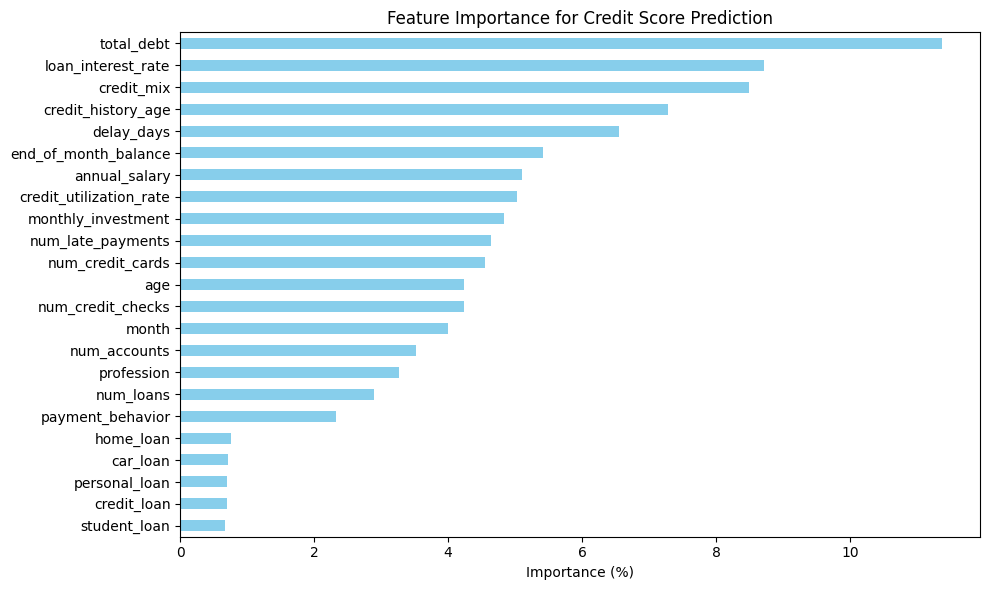

In [28]:
import matplotlib.pyplot as plt

importance.columns = ['Importance (%)']

# Sort and plot
importance.sort_values(by='Importance (%)', ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    color='skyblue',
    legend=False
)

# Add chart title and axis label
plt.title('Feature Importance for Credit Score Prediction')
plt.xlabel('Importance (%)')
plt.tight_layout()
plt.show()